# PyCUDA与图像处理-Gamma变换

In [56]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda.compiler import SourceModule
import string
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [45]:
def load_kernel_from_file(fname,kname):
    sources = None
    kernel = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read() # 通过str函数转换为unicode编码
        sm = SourceModule(str(sources))
        kernel = sm.get_function(kname)
    return kernel

def load_kernel_from_string(sources,kname):
    sm = SourceModule(str(sources))
    kernel = sm.get_function(kname)
    return kernel

In [46]:
gamma_transform = load_kernel_from_file('../../datas/cuda/07-histogram.cu','gamma_transform_2')

In [47]:
src = cv2.cvtColor(cv2.imread('../../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [48]:
src_float = src.astype(np.float32) / 255.0
dst_float = np.zeros_like(src_float)
rows,cols = src.shape[0],src.shape[1]

In [49]:
rows,cols = src.shape[0],src.shape[1]
block = (32,32,1)
grid = (int(cols / block[0] ),int(rows / block[1]),1)

print('block = ',block)
print('grid = ',grid)

block =  (32, 32, 1)
grid =  (20, 15, 1)


In [50]:
gamma_transform(drv.In(src_float),drv.Out(dst_float),np.int32(cols),np.int32(rows),np.float32(0.4),grid=grid,block=block)

In [51]:
dst = dst_float * 255
dst[dst < 0] = 0
dst[dst > 255] = 255
dst = dst.astype(np.uint8)

Text(0.5,1,'Gamma Transform:gamma=0.4')

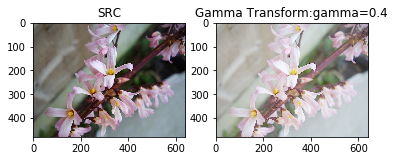

In [59]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Gamma Transform:gamma=0.4')